In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA as ARIMA
from scipy.stats.distributions import chi2
sns.set()
import warnings
warnings.filterwarnings("ignore")


C:\Users\Sruja\AppData\Local\Temp\ipykernel_11372\2928301570.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
raw_csv_data = pd.read_csv("Index2018.csv") 
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')

In [3]:
df_comp['market_value']=df_comp.ftse

In [4]:
#del df_comp['spx']
#del df_comp['dax']
#del df_comp['ftse']
#del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

# LLR TEST

In [5]:
def LLR_test(mod_1, mod_2, DF = 1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))    
    p = chi2.sf(LR, DF).round(3)
    return p

# CREATING RETURNS

In [33]:
df['returns'] = df.market_value.pct_change(1)*100

# ARIMA MODEL

In [7]:
model_ar_1_i_1_ma_1 = ARIMA(df.market_value, order=(1,1,1))
results_ar_1_i_1_ma_1 = model_ar_1_i_1_ma_1.fit()
results_ar_1_i_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -27604.005
Date:                Sun, 03 Mar 2024   AIC                          55214.010
Time:                        01:58:01   BIC                          55233.574
Sample:                    01-07-1994   HQIC                         55220.866
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7459      0.059     12.653      0.000       0.630       0.861
ma.L1         -0.7919      0.053    -14.924      0.000      -0.896      -0.688
sigma2      3498.7750     40.933     85.476      0.000    3418.548    3579.002
===================================================================================
Ljung-Box (L1) (Q):                   2.63   Jarque-Bera (JB):              3326.22
Prob(Q):                              0.11   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## RESIDUALS

In [8]:
 df['res_ar_1_i_1_ma_1'] = results_ar_1_i_1_ma_1.resid

<function matplotlib.pyplot.show(close=None, block=None)>

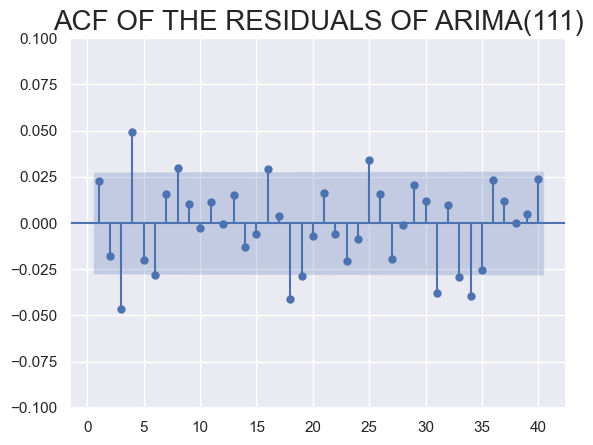

In [9]:
sgt.plot_acf(df.res_ar_1_i_1_ma_1[1:], zero = False, lags = 40)
plt.title("ACF OF THE RESIDUALS OF ARIMA(111)",size=20)
plt.ylim(-0.1,0.1)
plt.show

In [10]:
model_ar_1_i_1_ma_2 = ARIMA(df.market_value, order=(1,1,2))
results_ar_1_i_1_ma_2 = model_ar_1_i_1_ma_2.fit()
results_ar_1_i_1_ma_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(1, 1, 2)   Log Likelihood              -27600.408
Date:                Sun, 03 Mar 2024   AIC                          55208.815
Time:                        01:58:02   BIC                          55234.900
Sample:                    01-07-1994   HQIC                         55217.956
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5872      0.079      7.436      0.000       0.432       0.742
ma.L1         -0.6115      0.078     -7.826      0.000      -0.765      -0.458
ma.L2         -0.0457      0.012     -3.944      0.000      -0.068      -0.023
sigma2      3492.2448     40.727     85.748      0.000    3412.422    3572.068
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3317.85
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.91   Skew:                            -0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [11]:
model_ar_1_i_1_ma_3 = ARIMA(df.market_value, order=(1,1,3))
results_ar_1_i_1_ma_3 = model_ar_1_i_1_ma_3.fit()
results_ar_1_i_1_ma_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(1, 1, 3)   Log Likelihood              -27590.723
Date:                Sun, 03 Mar 2024   AIC                          55191.447
Time:                        01:58:03   BIC                          55224.053
Sample:                    01-07-1994   HQIC                         55202.873
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3589      0.087     -4.105      0.000      -0.530      -0.188
ma.L1          0.3391      0.087      3.898      0.000       0.169       0.510
ma.L2         -0.0589      0.010     -5.995      0.000      -0.078      -0.040
ma.L3         -0.1001      0.009    -10.847      0.000      -0.118      -0.082
sigma2      3487.1719     41.898     83.229      0.000    3405.052    3569.291
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2996.56
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.89   Skew:                            -0.30
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
model_ar_2_i_1_ma_1 = ARIMA(df.market_value, order=(2,1,1))
results_ar_2_i_1_ma_1 = model_ar_2_i_1_ma_1.fit()
results_ar_2_i_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(2, 1, 1)   Log Likelihood              -27600.131
Date:                Sun, 03 Mar 2024   AIC                          55208.261
Time:                        01:58:03   BIC                          55234.346
Sample:                    01-07-1994   HQIC                         55217.402
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6284      0.071      8.902      0.000       0.490       0.767
ar.L2         -0.0471      0.011     -4.223      0.000      -0.069      -0.025
ma.L1         -0.6513      0.069     -9.416      0.000      -0.787      -0.516
sigma2      3491.4696     40.737     85.708      0.000    3411.627    3571.312
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3308.71
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.91   Skew:                            -0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
model_ar_3_i_1_ma_1 = ARIMA(df.market_value, order=(3,1,1))
results_ar_3_i_1_ma_1 = model_ar_3_i_1_ma_1.fit()
results_ar_3_i_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(3, 1, 1)   Log Likelihood              -27592.336
Date:                Sun, 03 Mar 2024   AIC                          55194.672
Time:                        01:58:04   BIC                          55227.278
Sample:                    01-07-1994   HQIC                         55206.098
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4061      0.091     -4.445      0.000      -0.585      -0.227
ar.L2         -0.0584      0.010     -5.757      0.000      -0.078      -0.039
ar.L3         -0.0940      0.009    -10.098      0.000      -0.112      -0.076
ma.L1          0.3861      0.092      4.199      0.000       0.206       0.566
sigma2      3486.9393     41.890     83.240      0.000    3404.836    3569.042
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3003.19
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.89   Skew:                            -0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [14]:
model_ar_3_i_1_ma_2 = ARIMA(df.market_value, order=(3,1,2))
results_ar_3_i_1_ma_2 = model_ar_3_i_1_ma_2.fit()
results_ar_3_i_1_ma_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(3, 1, 2)   Log Likelihood              -27590.920
Date:                Sun, 03 Mar 2024   AIC                          55193.841
Time:                        01:58:05   BIC                          55232.968
Sample:                    01-07-1994   HQIC                         55207.551
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5767      0.077     -7.485      0.000      -0.728      -0.426
ar.L2         -0.4396      0.086     -5.134      0.000      -0.607      -0.272
ar.L3         -0.0966      0.010     -9.875      0.000      -0.116      -0.077
ma.L1          0.5587      0.077      7.213      0.000       0.407       0.710
ma.L2          0.3844      0.086      4.463      0.000       0.216       0.553
sigma2      3482.6368     41.996     82.927      0.000    3400.326    3564.948
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2988.77
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.88   Skew:                            -0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
print("\n ARIMA(1,1,1): \tLL =", results_ar_1_i_1_ma_1.llf, "\tAIC = ", results_ar_1_i_1_ma_1.aic)
print("\n ARIMA(1,1,2): \tLL =", results_ar_1_i_1_ma_2.llf, "\tAIC = ", results_ar_1_i_1_ma_2.aic)
print("\n ARIMA(1,1,3): \tLL =", results_ar_1_i_1_ma_3.llf, "\tAIC = ", results_ar_1_i_1_ma_3.aic)
print("\n ARIMA(2,1,1): \tLL =", results_ar_2_i_1_ma_1.llf, "\tAIC = ", results_ar_2_i_1_ma_1.aic)
print("\n ARIMA(3,1,1): \tLL =", results_ar_3_i_1_ma_1.llf, "\tAIC = ", results_ar_3_i_1_ma_1.aic)
print("\n ARIMA(3,1,2): \tLL =", results_ar_3_i_1_ma_2.llf, "\tAIC = ", results_ar_3_i_1_ma_2.aic)


 ARIMA(1,1,1): 	LL = -27604.00511572735 	AIC =  55214.0102314547

 ARIMA(1,1,2): 	LL = -27600.407632541006 	AIC =  55208.81526508201

 ARIMA(1,1,3): 	LL = -27590.723481948404 	AIC =  55191.44696389681

 ARIMA(2,1,1): 	LL = -27600.130551053444 	AIC =  55208.26110210689

 ARIMA(3,1,1): 	LL = -27592.33611647482 	AIC =  55194.67223294964

 ARIMA(3,1,2): 	LL = -27590.92031804885 	AIC =  55193.8406360977


In [16]:
print("LLR test: " + str(LLR_test(model_ar_1_i_1_ma_1, model_ar_1_i_1_ma_3, DF=2)))

LLR test: 0.0


In [17]:
print("LLR test: " + str(LLR_test(model_ar_1_i_1_ma_2, model_ar_1_i_1_ma_3)))

LLR test: 0.0


In [18]:
 df['res_ar_1_i_1_ma_3'] = results_ar_1_i_1_ma_3.resid.iloc[:]

<function matplotlib.pyplot.show(close=None, block=None)>

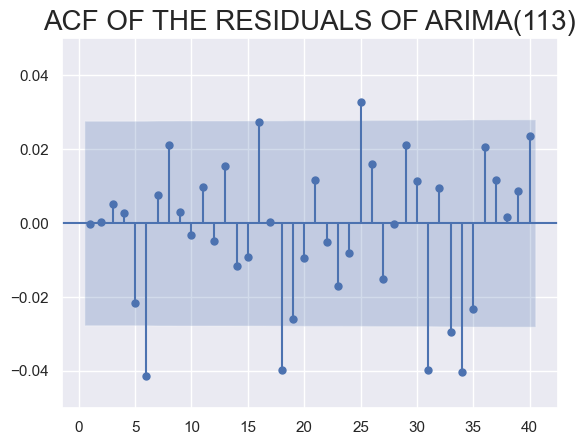

In [19]:
sgt.plot_acf(df.res_ar_1_i_1_ma_3[1:], zero = False, lags = 40)
plt.title("ACF OF THE RESIDUALS OF ARIMA(113)",size=20)
plt.ylim(-0.05,0.05)
plt.show

### since the 6th lag is significant in the graph we will have to check [ARIMA(1,1,1) ; ARIMA(6,1,6)]

### ARIMA[6,1,3] & ARIMA[5,1,1] had all significant values

In [20]:
model_ar_5_i_1_ma_1 = ARIMA(df.market_value, order=(5,1,1))
results_ar_5_i_1_ma_1 = model_ar_5_i_1_ma_1.fit()
results_ar_5_i_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(5, 1, 1)   Log Likelihood              -27586.845
Date:                Sun, 03 Mar 2024   AIC                          55187.689
Time:                        01:58:09   BIC                          55233.338
Sample:                    01-07-1994   HQIC                         55203.685
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4006      0.153      2.618      0.009       0.101       0.701
ar.L2         -0.0444      0.011     -4.071      0.000      -0.066      -0.023
ar.L3         -0.0542      0.013     -4.226      0.000      -0.079      -0.029
ar.L4          0.0587      0.015      3.914      0.000       0.029       0.088
ar.L5         -0.0580      0.009     -6.337      0.000      -0.076      -0.040
ma.L1         -0.4208      0.153     -2.743      0.006      -0.721      -0.120
sigma2      3479.0027     41.909     83.013      0.000    3396.862    3561.143
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3060.40
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
model_ar_6_i_1_ma_3 = ARIMA(df.market_value, order=(6,1,3))
results_ar_6_i_1_ma_3 = model_ar_6_i_1_ma_3.fit()
results_ar_6_i_1_ma_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(6, 1, 3)   Log Likelihood              -27583.858
Date:                Sun, 03 Mar 2024   AIC                          55187.717
Time:                        01:58:10   BIC                          55252.929
Sample:                    01-07-1994   HQIC                         55210.568
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0013      0.585     -0.002      0.998      -1.147       1.145
ar.L2         -0.3175      0.268     -1.187      0.235      -0.842       0.207
ar.L3         -0.1359      0.336     -0.405      0.686      -0.794       0.522
ar.L4          0.0130      0.040      0.326      0.745      -0.065       0.091
ar.L5         -0.0632      0.024     -2.663      0.008      -0.110      -0.017
ar.L6         -0.0388      0.054     -0.723      0.470      -0.144       0.066
ma.L1         -0.0194      0.585     -0.033      0.974      -1.165       1.126
ma.L2          0.2676      0.278      0.963      0.336      -0.277       0.812
ma.L3          0.0538      0.312      0.172      0.863      -0.557       0.665
sigma2      3475.1261     42.813     81.169      0.000    3391.214    3559.039
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3019.25
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.89   Skew:                            -0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
print("\n ARIMA(1,1,3): \tLL =", results_ar_1_i_1_ma_3.llf, "\tAIC = ", results_ar_1_i_1_ma_3.aic)
print("\n ARIMA(5,1,1): \tLL =", results_ar_5_i_1_ma_1.llf, "\tAIC = ", results_ar_5_i_1_ma_1.aic)
print("\n ARIMA(6,1,3): \tLL =", results_ar_6_i_1_ma_3.llf, "\tAIC = ", results_ar_6_i_1_ma_3.aic)


 ARIMA(1,1,3): 	LL = -27590.723481948404 	AIC =  55191.44696389681

 ARIMA(5,1,1): 	LL = -27586.844609585405 	AIC =  55187.68921917081

 ARIMA(6,1,3): 	LL = -27583.85849979406 	AIC =  55187.71699958812


## DF IS CHOSEN BY THE CALCULATION AS FOLLOWS
### ARIMA(1,1,3) = 1+3 = 4 
### ARIMA(6,1,3) = 6+3 = 9 
### 9-4 = 5 == DF 5

In [23]:
print("LLR test: " + str(LLR_test(model_ar_1_i_1_ma_3, model_ar_6_i_1_ma_3, DF = 5)))

LLR test: 0.017


In [24]:
print("LLR test: " + str(LLR_test(model_ar_5_i_1_ma_1, model_ar_6_i_1_ma_3, DF = 3)))

LLR test: 0.113


### ARIMA 6,1,3 FAILS LLR TEST , SO MOVE FORWARD WITH ARIMA[5,1,1]

In [25]:
 df['res_ar_5_i_1_ma_1'] = results_ar_5_i_1_ma_1.resid

<function matplotlib.pyplot.show(close=None, block=None)>

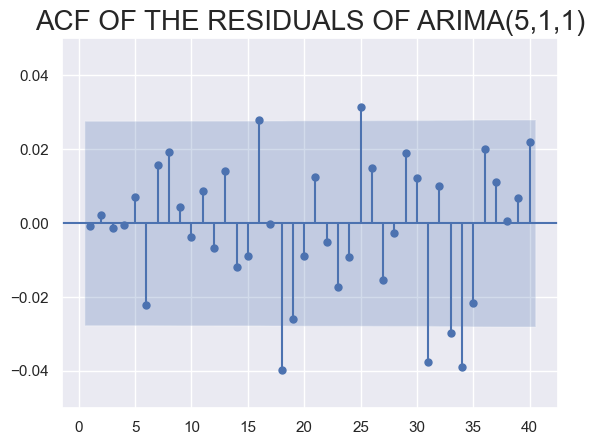

In [26]:
sgt.plot_acf(df.res_ar_5_i_1_ma_1[1:], zero = False, lags = 40)
plt.title("ACF OF THE RESIDUALS OF ARIMA(5,1,1)",size=20)
plt.ylim(-0.05,0.05)
plt.show

# MODELS WITH HIGHER LEVELS OF INTEGRATION

In [27]:
df['delta_prices'] = df.market_value.diff(1)

In [28]:
model_ar_1_i_1_ma_1 = ARIMA(df.delta_prices[1:], order=(1,0,1))
results_ar_1_i_1_ma_1 = model_ar_1_i_1_ma_1.fit()
results_ar_1_i_1_ma_1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           delta_prices   No. Observations:                 5020
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -27603.666
Date:                Sun, 03 Mar 2024   AIC                          55215.333
Time:                        01:58:15   BIC                          55241.418
Sample:                    01-10-1994   HQIC                         55224.473
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5639      0.753      0.749      0.454      -0.911       2.039
ar.L1          0.7476      0.059     12.673      0.000       0.632       0.863
ma.L1         -0.7937      0.053    -14.871      0.000      -0.898      -0.689
sigma2      3496.6352     41.191     84.888      0.000    3415.902    3577.368
===================================================================================
Ljung-Box (L1) (Q):                   2.64   Jarque-Bera (JB):              3327.38
Prob(Q):                              0.10   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [29]:
sts.adfuller(df.delta_prices[1:])

(-32.24409349570748,
 0.0,
 5,
 5014,
 {'1%': -3.4316548765428174,
  '5%': -2.8621166146845334,
  '10%': -2.5670769326348926},
 54845.96104221891)

#### since the adfuller test confirms that the data with 1 level of integration is enough and no further integration levels are necessarily needed

# ARIMAX

In [30]:
model_ar_1_i_1_ma_1_Xspx = ARIMA(df.market_value, exog = df.spx ,order=(1,1,1))
results_ar_1_i_1_ma_1_Xspx = model_ar_1_i_1_ma_1_Xspx.fit()
results_ar_1_i_1_ma_1_Xspx.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -26693.392
Date:                Sun, 03 Mar 2024   AIC                          53394.784
Time:                        01:58:17   BIC                          53420.869
Sample:                    01-07-1994   HQIC                         53403.925
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
spx            2.6928      0.035     76.407      0.000       2.624       2.762
ar.L1          0.2571      0.029      8.812      0.000       0.200       0.314
ma.L1         -0.5460      0.025    -21.791      0.000      -0.595      -0.497
sigma2      2433.0771     27.350     88.961      0.000    2379.472    2486.682
===================================================================================
Ljung-Box (L1) (Q):                   0.24   Jarque-Bera (JB):              4423.90
Prob(Q):                              0.62   Prob(JB):                         0.00
Heteroskedasticity (H):               1.25   Skew:                            -0.57
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# SARIMAX MODEL - SEASONAL ARIMAX

In [31]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [32]:
model_sarimax = SARIMAX(df.market_value, exog = df.spx ,order=(1,0,1), seasonal_order = (2,0,1,5))
results_sarimax = model_sarimax.fit()
results_sarimax.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                      market_value   No. Observations:                 5021
Model:             SARIMAX(1, 0, 1)x(2, 0, 1, 5)   Log Likelihood              -26712.597
Date:                           Sun, 03 Mar 2024   AIC                          53439.194
Time:                                   01:58:28   BIC                          53484.844
Sample:                               01-07-1994   HQIC                         53455.191
                                    - 04-05-2013                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
spx            2.6851      0.035     75.827      0.000       2.616       2.755
ar.L1          0.9999      0.000   3139.631      0.000       0.999       1.001
ma.L1         -0.3109      0.009    -33.057      0.000      -0.329      -0.292
ar.S.L5        0.9657      0.005    193.554      0.000       0.956       0.975
ar.S.L10       0.0341      0.004      7.941      0.000       0.026       0.043
ma.S.L5       -0.9994      0.007   -140.902      0.000      -1.013      -0.985
sigma2      2439.7859     28.915     84.377      0.000    2383.113    2496.459
===================================================================================
Ljung-Box (L1) (Q):                   2.15   Jarque-Bera (JB):              4191.55
Prob(Q):                              0.14   Prob(JB):                         0.00
Heteroskedasticity (H):               1.24   Skew:                            -0.52
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""